# Ajuste polinomial de curvas

*El ajuste polinomial de curvas es un método utilizado en estadística y análisis de datos para encontrar una función polinomial que se ajuste mejor a un conjunto de datos dado. En lugar de ajustarse a una línea recta como en la regresión lineal, el ajuste polinomial permite modelar relaciones más complejas entre las variables.*

*El ajuste polinomial puede ser útil cuando los datos muestran una tendencia no lineal o curvilínea. Sin embargo, es importante tener en cuenta que un polinomio de alto grado puede llevar al sobreajuste, donde el modelo se ajusta demasiado a los datos de entrenamiento y pierde capacidad de generalización para nuevos datos.*


![ajuste_Curvas](../Media/AjusteCurvas.png)

$[ p(x) = a_0 + a_1x + a_2x^2 + \ldots + a_{n-1}x^{n-1} ]$



1. **Forma de la función:**
   - **Regresión lineal:** Modela la relación entre una variable independiente $ x $ y una variable dependiente  $y$  como una línea recta. La ecuación típica es $ y = beta_0 + beta_1x $, donde $beta_0 $ y $beta_1 $ son coeficientes que definen la pendiente y la intersección en el eje $ y $, respectivamente.
   - **Ajuste polinomial:** Modela la relación entre $ x $ e $ y $ utilizando un polinomio de grado $ n $. La ecuación general es $ y = beta_0 + beta_1x + beta_2x^2 + \ldots + beta_nx^n $, donde $beta_0, beta_1, \ldots, \beta_n $ son coeficientes.

2. **Flexibilidad del modelo:**
   - La regresión lineal es útil para modelar relaciones lineales simples entre variables. Es adecuada cuando los datos muestran una tendencia lineal clara.
   - El ajuste polinomial es más flexible y puede modelar relaciones no lineales o curvilíneas entre variables. Esto permite capturar patrones más complejos en los datos.

3. **Sensibilidad al sobreajuste:**
   - **Regresión lineal:** Al ser un modelo simple, la regresión lineal tiende a ser menos propensa al sobreajuste, lo que significa que generalmente es más estable con nuevos datos.
   - **Ajuste polinomial:** Los polinomios de grado alto pueden conducir fácilmente al sobreajuste, especialmente cuando se utilizan para ajustar conjuntos de datos pequeños. Un ajuste polinomial de alto grado puede adaptarse demasiado a los datos de entrenamiento y perder capacidad de generalización.

4. **Interpretación de coeficientes:**
   - En la regresión lineal, los coeficientes $beta_0 $ y $beta_1 $ tienen interpretaciones directas como la intersección en el eje $ y $ y la pendiente de la línea, respectivamente.
   - En el ajuste polinomial, los coeficientes tienen interpretaciones menos directas debido a la mayor complejidad del modelo. Por ejemplo, en un ajuste polinomial de segundo grado $ n = 2 $ , $ beta_0 $ sería la intersección en el eje $ y $, \$ beta_1$ representaría la contribución lineal y $ beta_2 $ estaría relacionado con la curvatura de la función.

# Cuando usarlo y cuando no

Supongamos que estás analizando datos de ventas de una empresa a lo largo del tiempo. Tienes información sobre las ventas mensuales durante varios años. Tu objetivo es predecir las ventas futuras en función del tiempo.

- **Regresión lineal:** Si los datos muestran una tendencia clara y constante en el tiempo, es decir, un aumento o disminución lineal en las ventas a lo largo de los meses o años, entonces la regresión lineal podría ser la elección adecuada. Por ejemplo, si las ventas han estado creciendo a un ritmo constante del 5% cada año, una regresión lineal podría capturar bien esa tendencia.
  
- **Ajuste polinomial:** Sin embargo, si los datos no siguen una tendencia lineal clara y muestran variaciones no lineales, como picos y valles irregulares a lo largo del tiempo, entonces un ajuste polinomial podría ser más apropiado. Por ejemplo, si las ventas tienen estacionalidad, con aumentos significativos en ciertos meses del año (como durante las vacaciones), un ajuste polinomial podría modelar mejor esas fluctuaciones.

En este caso, la regresión lineal sería más adecuada si las ventas muestran una tendencia de crecimiento o disminución constante con el tiempo, mientras que el ajuste polinomial sería más útil si las ventas tienen patrones más complejos y no lineales a lo largo del tiempo, como estacionalidad o variaciones irregulares.


In [49]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures



In [50]:
x = np.array([1, 2, 3, 4, 5])

y = np.array([2, 3, 5, 7, 9])


Nota: Si vamos a trabajar con un columna de pandas debemos de transformarla a una arreglo unidimensional

Ejemplo:

x_array = x.values.reshape(-1, 1) #Necesitamos transformar nuestra columna de pandas en un arreglo de una sola dimension Unidimensional

In [51]:
poly_degree=2

poly_features = PolynomialFeatures(degree=poly_degree) #Creacion de instancia para poder trabajar con polinomios

x_poly=poly_features.fit_transform(x.reshape(-1,1)) #Ahora ya en unidimensional ya podemos adapatarlo en un polinomio




In [52]:
lineal_regresion_Aux=LinearRegression()


lineal_regresion_Aux.fit(x_poly,y)



LinearRegression()

In [53]:
x_pred = np.linspace(min(x), max(x), 100).reshape(-1, 1)

X_pred_poly = poly_features.transform(x_pred)

y_pred = lineal_regresion_Aux.predict(X_pred_poly)

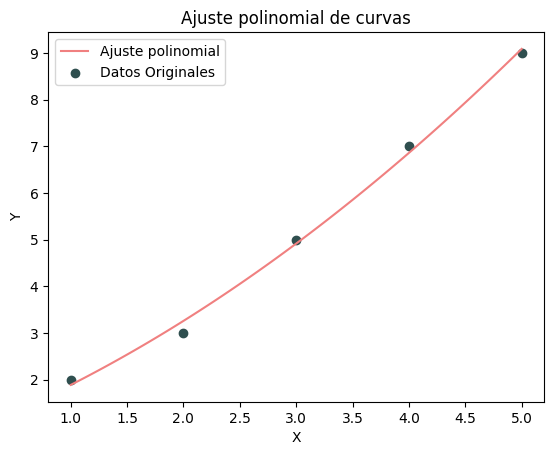

In [54]:
plt.plot(x_pred, y_pred, color='lightcoral',label='Ajuste polinomial')

plt.scatter(x,y,color="darkslategrey",label="Datos Originales")

plt.xlabel('X')

plt.ylabel('Y')

plt.title('Ajuste polinomial de curvas')

plt.legend()

plt.show()

In [55]:
# Suponiendo que model es tu modelo de regresión polinomial ajustado
coefficients = lineal_regresion_Aux.coef_

intercept = lineal_regresion_Aux.intercept_

# Imprimir la fórmula del polinomio
print("Fórmula del polinomio ajustado:")
print(f"y = {intercept}", end="")

for i in range(1, len(coefficients)):
    print(f" + {coefficients[i]} * x^{i}", end="")

print()

Fórmula del polinomio ajustado:
y = 0.8000000000000087 + 0.9428571428571346 * x^1 + 0.14285714285714435 * x^2
